In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

t = Symbol('t')
x = Sin(t) - t*Cos(t)
y = Cos(t)+ t * Sin(t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy_x, dy2_xx)
dy2_xx = simplify(dy2_xx)
display(dy2_xx)

cos(t)/sin(t)

(t*(-t*sin(t) + cos(t))*sin(t) - t*(t*cos(t) + sin(t))*cos(t))/(t**3*sin(t)**3)

-1/(t*sin(t)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

t = Symbol('t')
x = t**2 - 2*t
y = t**2 +2*t
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy_x, dy2_xx)

dy_x_num, dy_x_den = fraction(dy_x)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)
dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

(2*t + 2)/(2*t - 2)

-8/(2*t - 2)**3

'Первая производная, нули числителя:'

FiniteSet(-1)

'нули знаменателя:'

FiniteSet(1)

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

FiniteSet(1)

### Задание 3. 
Найти точки экстремума и точки перегиба функции Задания 2.

In [9]:
crit_points = Union(dy_x_num_nul, dy_x_den_nul) 
crit_points_interval = list(crit_points)
crit_points_interval.sort()
crit_points_interval

points = [-2,0,2]
max_arr=[]
min_arr=[]
for i, item in enumerate(crit_points_interval):
    if item in dy_x_num_nul:
        df_left = dy_x.subs(t, points[i])
        df_right = dy_x.subs(t, points[i + 1])
        x_left = float(x.subs(t, points[i]))
        x_right = float(x.subs(t, points[i + 1]))
        if df_left < 0 and df_right > 0 and x_left < x_right or df_left > 0 and df_right < 0 and x_left > x_right:
            min_arr.append(item)
        elif df_left < 0 and df_right > 0 and x_left > x_right or df_left > 0 and df_right < 0 and x_left < x_right:
            max_arr.append(item) 
display('максимум', max_arr, 'минимум', min_arr)

'максимум'

[]

'минимум'

[-1]

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно. 
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [26]:
from sympy import exp as Exp
t = Symbol('t')
x = Exp(t)
y = t * Exp(2*t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy2_xx)
display(continuous_domain(dy2_xx, t, S.Reals)) # область определения второй производной
# вторая производная определена на R => единственные возможные точки перегиба - это ее нули
dy2_xx = simplify(dy2_xx)

dy2_xx_nul = solveset(dy2_xx, t,S.Reals )
#display(dy2_xx_nul)
dy2_xx_points = list((dy2_xx_nul))
dy2_xx_points.sort()
#display(dy2_xx_points)

points = [dy2_xx_points[0]-1,dy2_xx_points[0]+1]

inflection=[]
for i, item in enumerate(dy2_xx_points):
    df_left = dy2_xx.subs(t, points[i]) 
    df_right = dy2_xx.subs(t, points[i + 1])
    if df_left*df_right < 0:
        inflection.append(item) 
display('перегиб ', inflection)

(4*(t + 1)*exp(3*t) - (2*t*exp(2*t) + exp(2*t))*exp(t))*exp(-3*t)

Reals

'перегиб '

[-3/2]

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

't -> -oo'

'x: '

oo

'y: '

-oo

't -> +oo'

'x: '

oo

'y: '

oo

Асимптоты: 

t -> +oo
k =  1/3
b =  0
Итог: y = 1/3x + 0 

t -> -oo
k =  -1/3
b =  0
Итог: y = -1/3x + 0


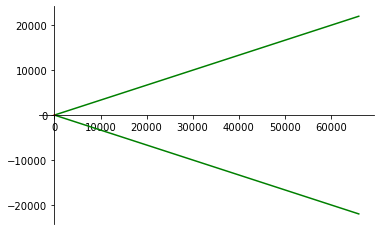

In [69]:
#143
# x = 3*e^t + 3*e^-t
# y = e^t - e^-t
from sympy import oo as oo
# претенденты на вертикальные и горизонтальные асимптоты: +оо, -оо
t = Symbol('t')
x = 3*Exp(t) + 3*Exp(-t)
y = Exp(t) - Exp(-t)
display('t -> -oo', 'x: ',limit(x, t, -oo),'y: ', limit(y, t, -oo)) # асимптот нет
display('t -> +oo', 'x: ',limit(x, t, +oo),'y: ', limit(y, t, +oo)) # асимптот нет

# итак, функция не имеет вертикальных и горизонтальных асимптот

#найдем наклонные асимптоты:
print('Асимптоты: \n')
print('t -> +oo')
k = limit(y/x, t, +oo)
print('k = ', k)
b = limit(y - k*x, t, +oo)
print('b = ', b)
print("Итог: y = %(k)sx + %(b)s \n"%{'k':k, 'b':b})

print('t -> -oo')
k = limit(y/x, t, -oo)
print('k = ', k)
b = limit(y - k*x, t, -oo)
print('b = ', b)
print("Итог: y = %(k)sx + %(b)s"%{'k':k, 'b':b})

# строим график

T = np.linspace(-10, 10, 100)
ax = plt.gca()
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none') 
ax.spines['bottom'].set_position(('data', 0)) 
ax.spines['left'].set_position(('data', 0))
ax.plot(3*np.exp(T) + 3*np.exp(-T), np.exp(T) - np.exp(-T), color='green')
ax.plot(T,[1/3*x for x in T], color = 'red')
ax.plot(T,[-1/3*x for x in T], color = 'red')